# How to build an Image Recognition model in just 15 lines of code (Keras)

In [4]:
import numpy as np
import pandas as pd
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import *
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from keras.utils import multi_gpu_model
import itertools
import matplotlib.pyplot as plt
import gc
import tensorflow as tf
from keras.optimizers import *
from keras.preprocessing.image import *
from tensorboard import *
import time
from keras.callbacks import *
from keras.callbacks import TensorBoard
from keras.callbacks import ReduceLROnPlateau
from PIL import Image
from keras.models import load_model
import glob
import requests
from io import *
from skimage.io import imread
from skimage import exposure, color
from skimage.transform import resize
import shutil
import urllib
%matplotlib inline


In [5]:
#Defining a path to training and test images
train_path = 'FD/Train'

validation_path = 'FD/Validation'

In [6]:
# Preprocess Image - Scaling
datagen = ImageDataGenerator(rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen_test = ImageDataGenerator(rescale = 1./255)

In [7]:
#automatically generate target label from the directory structure 
train_batches = datagen.flow_from_directory(train_path, 
                                           target_size=(224,224), 
                                                      batch_size = 256,
                                                      color_mode="rgb",
                                                      class_mode="categorical",
                                                      shuffle=True,
                                                      seed=42)

validation_batches = datagen_test.flow_from_directory(validation_path, 
                                                      target_size=(224,224), 
                                                      batch_size = 256,
                                                      color_mode="rgb",
                                                      class_mode="categorical",
                                                      shuffle=True,
                                                      seed=42)

Found 484965 images belonging to 25 classes.
Found 12500 images belonging to 25 classes.


In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       73856     
__________

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
model.fit_generator(
        train_batches,
        steps_per_epoch= 484965 // 256,
        epochs=10,
        validation_steps= 12500 // 256,
        validation_data=validation_batches)

In [30]:
model = load_model('./Model 4.h5')

In [48]:
def classify(img_url):    
    pic = Image.open(BytesIO(urllib.request.urlopen(img_url).read()))
    pic = pic.resize((224,224))
    x = img_to_array(pic)
    x = x.reshape((1,) + x.shape)
    x = x * 1./255
    label = model.predict_classes(x)[0]
#     dic = {v: k for k, v in target.items()}
#     print('Class: ',dic[label])
    print(label)
    plt.imshow(pic)
    plt.pause(0.05)
    #input('Class: ')

10


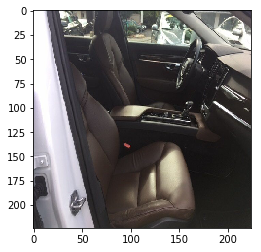

None


In [49]:
print(classify('http://akimage.vinsolutions.com/v/858540000/858546285/r640'))